In [115]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from scipy.integrate import simps
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
old_k = pd.Series([864, 138, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity
nonzero_k = pd.Series([68236, 864, 138, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

k = pd.Series([579, 99, 29, 6, 3, 0]) # ground truth using koi_score>0.9 instead of koi_disposition!='FALSE POSITIVE'
k = pd.Series([646, 119, 32, 10, 4, 0]) # ground truth using koi_score>0.5 instead of koi_disposition!='FALSE POSITIVE'
k = pd.Series([1113, 117, 35, 9, 3, 0]) # ground truth using fpp_prob<=0.5

print("observed ratio of koi_disposition:koi_score: ", old_k/k)

observed ratio of koi_disposition:koi_score:  0    0.776280
1    1.179487
2    1.085714
3    1.666667
4    1.666667
5         NaN
dtype: float64


In [116]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [117]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_fixed_detection5.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','geom_transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.geom_transit_multiplicity = df.geom_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats


                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL                             transit_multiplicity  \
0  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3  0.1  -791.3944345201753                [244.5, 15.8, 0.0, 0.0, 0.0, 0.0]   
4  0.1   -797.280763843821  [242.8, 15.600000000000001, 0.0, 0.0, 0.0, 0.0]   

             geom_transit_multiplicity intac

In [118]:
import copy 

def add_zero_bin(curr_row: pd.Series):
    temp = copy.copy(curr_row.transit_multiplicity)
    temp.insert(0, nonzero_k[0]-np.sum(temp))
    
    return temp

df['transit_multiplicity_zero_bin'] = df.apply(func=add_zero_bin, axis=1)
print(df['transit_multiplicity_zero_bin'])

0                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3               [67975.7, 244.5, 15.8, 0.0, 0.0, 0.0, 0.0]
4        [67977.6, 242.8, 15.600000000000001, 0.0, 0.0,...
                               ...                        
43841    [63601.9, 2291.4, 1324.8, 636.3000000000001, 3...
43842    [63619.9, 2259.0, 1322.1000000000001, 656.1, 2...
43843    [63062.0, 2663.0, 1420.0, 697.0, 309.0, 72.0, ...
43844    [63087.0, 2546.0, 1472.0, 707.0, 334.0, 80.0, ...
43845    [63107.0, 2510.0, 1469.0, 729.0, 315.0, 101.0,...
Name: transit_multiplicity_zero_bin, Length: 43846, dtype: object


In [119]:
def normalize(curr_row: pd.Series, column):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row[column]
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f'] ### removed as of 13 June 2022 because the following step takes care of this
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
        
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        if column=='transit_multiplicity_zero_bin': # zero bin case
            return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
        
        elif column=='transit_multiplicity': # excluding zero bin            
            return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - k: Kepler transit multiplicity; normally a global variable, but this is so it's flexible to including the zero-bin (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, args=['transit_multiplicity'], axis=1)
df['normalized_transit_multiplicity_zero_bin'] = df.apply(func=normalize, args=['transit_multiplicity_zero_bin'], axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike, args=[k])
df['normalized_logL_zero_bin'] = df['normalized_transit_multiplicity_zero_bin'].apply(func=normalized_loglike, args=[nonzero_k])

df['likelihood'] = np.exp(df['logL'])
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
df['normalized_likelihood_zero_bin'] = np.exp(df['normalized_logL_zero_bin'])


In [120]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c): # basically removes grids in 4d param space, which causes problems later when marginalizing
    if m==0:
        return 1e8
    else:
        return c

def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1) 
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['normalized_likelihood'] = np.exp(df['normalized_logL'])

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))



In [121]:
df[['normalized_likelihood', 'normalized_logL']]

,normalized_likelihood,normalized_logL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,1.355556e-55,-126.337968
4,1.060877e-55,-126.583084
...,...,...
43841,2.553932e-187,-429.645778
43842,1.315014e-191,-439.519906
43843,8.981191e-171,-391.546918
43844,2.553932e-187,-429.645778


In [122]:
len(df.filename.unique())

3986

#### Models that best fit the observed multiplicity, based off an arbitrary (normalized, 1+ bin) logL threshold

In [123]:
### make logL-based cut
threshold = -50 # -50
#df_keep = df.loc[(df.normalized_logL >= threshold)] 
df_keep = df.loc[(df.logL >= threshold)] 
###df_keep = df.loc[(df.normalized_logL_zero_bin >= -100)] 
print(len(df_keep), len(df))
print(len(df_keep.groupby(['m','b','c','f']).size()), len(df.groupby(['m','b','c','f']).size()))

945 43846
336 14641


total:  14641
remaining based on transit multiplicity:  336


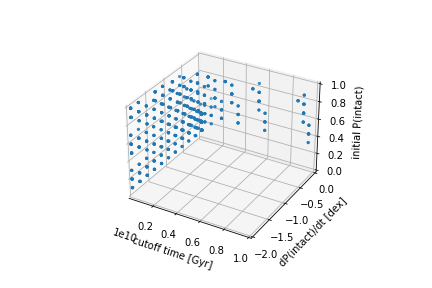

In [124]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("total: ", len(df.groupby(['m','b','c','f']).size()))
print("remaining based on transit multiplicity: ", len(df_keep.groupby(['m','b','c','f']).size()))
#df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
#print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.savefig('paper/good_models_unnormalized.pdf', format='pdf')
plt.show()

#### Fraction of planet hosts vs normalized (0+ bin) logL

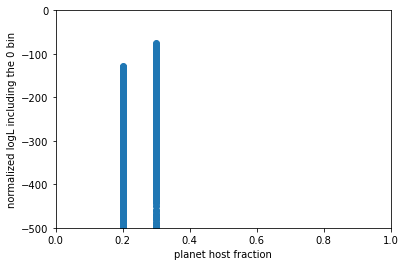

In [85]:
%matplotlib inline

plt.scatter(df.f, df.normalized_logL_zero_bin)
plt.xlabel('planet host fraction')
plt.ylabel('normalized logL including the 0 bin')
plt.ylim([-500, 0])
plt.xlim([0, 1])
plt.savefig('paper/f_v_logL.pdf', format='pdf')
plt.show()

Models are, across the board, worse using the new observed transit multiplicity with the koi_score (vs koi_disposition) cut, *at least when I use the 0+ bin)*. But at least it's consistent for the 3D "good" surface shape and the previously favored planet host fraction of 0.2.

Shoot, this was the case for koi_score>0.9. But with koi_score>0.5, I now seem to favor a planet-host fraction of 0.3.

#### Intact fraction vs normalized (1+ bin) logL

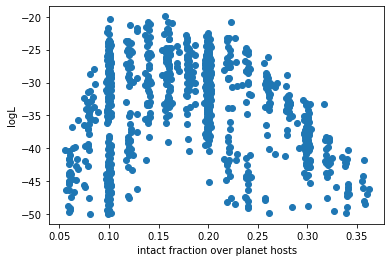

In [86]:
%matplotlib inline

plt.scatter(df_keep.intact_frac2, df_keep.logL)
plt.xlabel('intact fraction over planet hosts')
plt.ylabel('logL')
plt.savefig('paper/intact_v_logL_unnormalized.pdf', format='pdf')
plt.show()

#### Fraction of cold vs hot systems

Recreating Moriarty & Ballard 2016

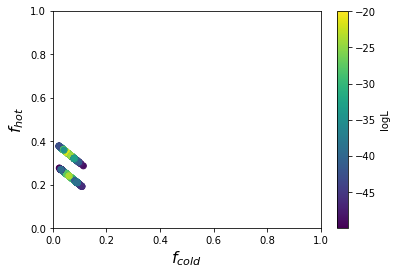

In [87]:
f_cool = df_keep.intact_frac2*df_keep.f
f_hot = df_keep.disrupted_frac2*df_keep.f
plt.scatter(f_cool, f_hot, c=df_keep.logL)
plt.xlabel('$f_{cold}$', fontsize=16)
plt.ylabel('$f_{hot}$', fontsize=16)
cbar = plt.colorbar()
cbar.set_label('logL')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.savefig('paper/cold_v_hot_unnormalized.pdf', format='pdf')
plt.show()

#### Intermediate cuts

In [88]:
df_not_keep = df.loc[~(df.normalized_logL > -50)]

### second wave of cuts
df_keep2 = df_keep.loc[(np.round(df_keep.f,1) == 0.3) & (df_keep.normalized_logL_zero_bin > -100)]
df_not_keep2 = df_keep.loc[~(np.round(df_keep.f,1) == 0.3) | ~(df_keep.normalized_logL_zero_bin > -100)]
print(len(df_keep2), len(df_not_keep2), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep2.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep2.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

0 945 945
336
0
14641


In [89]:
df_keep

,filename,m,b,c,f,logL,transit_multiplicity,geom_transit_multiplicity,intact_frac,disrupted_frac,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
372,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.3,-47.411581,"[710.4000000000001, 87.00000000000001, 27.9000...","[2, 31351, 30877, 43, 78, 3374, 3520, 13, 21, ...",0.086392,0.213603,...,"[67398.4, 710.4000000000001, 87.00000000000001...","[687.8395415472779, 84.23710601719198, 27.0139...","[65258.00191021966, 687.8395415472779, 84.2371...",-23.043201,-128.443511,2.566917e-21,9.827997e-11,1.650791e-56,100000000.0,True
373,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.3,-43.602118,"[773.4000000000001, 81.60000000000001, 19.2000...","[31218, 31038, 3522, 3518, 0.0, 0.0, 0.0]",0.087987,0.212013,...,"[67346.8, 773.4000000000001, 81.60000000000001...","[705.3839406207827, 74.42375168690958, 17.5114...","[61424.038236617176, 705.3839406207827, 74.423...",-32.487095,-433.952032,1.158352e-19,7.780972e-15,3.443716e-189,100000000.0,True
374,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.3,-43.697295,"[795.9000000000001, 82.50000000000001, 21.0000...","[1, 31130, 31069, 111, 60, 3339, 3547, 26, 10, 4]",0.086770,0.213228,...,"[67324.3, 795.9000000000001, 82.50000000000001...","[707.9904573872984, 73.38762750904903, 18.6804...","[59888.129099484475, 707.9904573872984, 73.387...",-35.942452,-630.063290,1.053188e-19,2.456923e-16,2.328038e-274,100000000.0,True
375,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.4,-21.668584,"[947.2, 116.0, 37.2, 12.4, 3.2, 0.8]","[2, 31351, 30877, 43, 78, 3374, 3520, 13, 21, ...",0.115190,0.284804,...,"[67119.2, 947.2, 116.0, 37.2, 12.4, 3.2, 0.8]","[687.8395415472779, 84.23710601719198, 27.0139...","[48740.75143266474, 687.8395415472779, 84.2371...",-23.043201,-3524.723820,3.885557e-10,9.827997e-11,0.000000e+00,100000000.0,True
376,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.4,-35.059121,"[1031.2, 108.80000000000001, 25.6, 14.4, 5.600...","[31218, 31038, 3522, 3518, 0.0, 0.0, 0.0]",0.117317,0.282683,...,"[67050.4, 1031.2, 108.80000000000001, 25.6, 14...","[705.3839406207827, 74.42375168690958, 17.5114...","[45865.27867746288, 705.3839406207827, 74.4237...",-32.487095,-4806.442626,5.943155e-16,7.780972e-15,0.000000e+00,100000000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41271,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,6.309573e+09,0.3,-37.682956,"[740.1000000000001, 157.20000000000002, 66.000...","[24325, 24356, 10261, 10354, 0.0, 0.0, 0.0]",0.182493,0.117507,...,"[67235.5, 740.1000000000001, 157.2000000000000...","[599.9211394302848, 127.42548725637181, 53.499...","[54500.740129935024, 599.9211394302848, 127.42...",-26.692300,-1678.580800,4.310226e-17,2.556711e-12,0.000000e+00,100000000.0,True
41272,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,6.309573e+09,0.3,-37.754161,"[745.5000000000001, 153.90000000000003, 67.200...","[24161, 24265, 10560, 10310, 0.0, 0.0, 0.0]",0.183602,0.116398,...,"[67230.7, 745.5000000000001, 153.9000000000000...","[601.4130110414801, 124.15487914055505, 54.211...","[54236.64348950561, 601.4130110414801, 124.154...",-27.273037,-1746.286586,4.013990e-17,1.430443e-12,0.000000e+00,100000000.0,True
41303,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.3,1.000000e+10,0.3,-35.467431,"[775.5000000000001, 164.40000000000003, 66.600...","[24289, 24282, 10321, 10404, 0.0, 0.0, 0.0]",0.183050,0.116950,...,"[67190.8, 775.5000000000001, 164.4000000000000...","[601.7322043628013, 127.56257175660161, 51.676...","[52135.226559510134, 601.7322043628013, 127.56...",-26.298457,-2340.347825,3.950847e-16,3.790749e-12,0.000000e+00,100000000.0,True
41304,/blu

In [90]:
#df_keep4 = df_keep.loc[df_keep.logL_zero_bin > -100]
#print(len(df_keep4.groupby(['b','c','m','f'])))

In [61]:
df_keep3 = df_keep.loc[np.round(df_keep.f,1) == 0.3]
df_not_keep3 = df_keep.loc[~(np.round(df_keep.f,1) == 0.3)]
df_keep4 = df_keep.loc[df_keep.normalized_logL_zero_bin > -250]
df_not_keep4 = df_keep.loc[~(df_keep.normalized_logL_zero_bin > -250)]
df_keep5 = df_keep.loc[np.round(df_keep.f,1) == 0.4]
df_not_keep5 = df_keep.loc[~(np.round(df_keep.f,1) == 0.4)]
print(len(df_keep3), len(df_not_keep3), len(df_keep4), len(df_not_keep4), len(df_keep5), len(df_not_keep5), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep3.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep3.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep4.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep4.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep5.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep5.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df_keep.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

761 6849 126 7484 761 6849 7610
2358
262
2596
67
2358
262
2620


In [66]:
df_keep4.drop_duplicates(subset=['m','b','c','f'])

,filename,m,b,c,f,logL,transit_multiplicity,geom_transit_multiplicity,intact_frac,disrupted_frac,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
372,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.3,-47.411581,"[710.4000000000001, 87.00000000000001, 27.9000...","[2, 31351, 30877, 43, 78, 3374, 3520, 13, 21, ...",0.086392,0.213603,...,"[67398.4, 710.4000000000001, 87.00000000000001...","[687.8395415472779, 84.23710601719198, 27.0139...","[65258.00191021966, 687.8395415472779, 84.2371...",-23.043201,-128.443511,2.566917e-21,9.827997e-11,1.650791e-56,1.000000e+08,True
1459,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.4,1.000000e+08,0.2,-115.933286,"[529.6, 128.0, 64.2, 30.200000000000003, 8.0, ...","[1, 20763, 20887, 37, 18, 13723, 13776, 42, 18...",0.141485,0.058514,...,"[67475.0, 529.6, 128.0, 64.2, 30.2000000000000...","[564.396320630749, 136.40998685939553, 68.4181...","[71908.31143232589, 564.396320630749, 136.4099...",-45.785826,-200.374442,4.475211e-51,1.304574e-20,9.516678e-88,1.000000e+08,True
1846,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.5,1.584893e+08,0.3,-48.624322,"[730.8000000000001, 78.9, 23.700000000000003, ...","[1, 31068, 31230, 104, 55, 3379, 3439, 11, 8, 2]",0.085729,0.214269,...,"[67384.9, 730.8000000000001, 78.9, 23.70000000...","[696.3679943602397, 75.1825872400423, 22.58336...","[64210.02690635646, 696.3679943602397, 75.1825...",-29.350937,-189.822119,7.633525e-22,1.790812e-13,3.641676e-83,1.584893e+08,True
3320,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.9,2.511886e+08,0.3,-42.832148,"[728.1000000000001, 89.10000000000001, 24.6000...","[31110, 31256, 3468, 3462, 0.0, 0.0, 0.0]",0.086793,0.213207,...,"[67378.3, 728.1000000000001, 89.10000000000001...","[688.4564533053515, 84.24868835257082, 23.2605...","[63709.690218024945, 688.4564533053515, 84.248...",-24.294583,-219.071741,2.501696e-19,2.811878e-11,7.216918e-96,2.511886e+08,True
4344,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.1,1.000000e+08,0.3,-45.453502,"[733.2000000000002, 82.80000000000001, 26.4000...","[30929, 31377, 3475, 3515, 0.0, 0.0, 0.0]",0.087323,0.212677,...,"[67380.4, 733.2000000000002, 82.80000000000001...","[694.9803646563815, 78.48387096774194, 25.0238...","[63868.05095839175, 694.9803646563815, 78.4838...",-26.262309,-210.154174,1.818841e-20,3.930287e-12,5.385198e-92,1.000000e+08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40379,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,6.309573e+08,0.3,-45.624517,"[742.8000000000001, 86.70000000000002, 20.7000...","[31219, 31047, 3508, 3522, 0.0, 0.0, 0.0]",0.087901,0.212099,...,"[67375.0, 742.8000000000001, 86.70000000000002...","[699.6641114982579, 81.66515679442509, 19.4979...","[63462.398373983735, 699.6641114982579, 81.665...",-27.559306,-240.719063,1.532937e-20,1.074350e-12,2.864436e-105,1.000000e+08,True
40412,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,1.000000e+09,0.3,-44.131650,"[732.6000000000001, 82.80000000000001, 28.5000...","[31146, 31227, 3427, 3496, 0.0, 0.0, 0.0]",0.086806,0.213194,...,"[67377.7, 732.6000000000001, 82.80000000000001...","[692.2271932890598, 78.23698007689619, 26.9293...","[63664.58662472327, 692.2271932890598, 78.2369...",-25.625332,-223.734033,6.821315e-20,7.431209e-12,6.816227e-98,1.000000e+08,True
40446,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,1.584893e+09,0.3,-46.162756,"[734.4000000000001, 83.4, 22.500000000000004, ...","[31221, 31167, 3516, 3392, 0.0, 0.0, 0.0]",0.086545,0.213455,...,"[67380.7, 734.4000000000001, 83.4, 22.50000000...","[696.3619782532445, 79.08032269379166, 21.3346...","[63890.737402081126, 696.3619782532445, 79.080...",-27.295602,-209.244467,8.948904e-21,1.398526e-12,1.337465e-91,1.000000e+0

Same as above, but with just the 1+ bins

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


[707.7000000000002, 73.80000000000001, 14.8, 5.2, 0.9000000000000001, 0.30000000000000004] [764.7000000000002, 125.70000000000002, 44.70000000000001, 19.6, 5.700000000000001, 0.8] [1061.2, 194.8, 81.60000000000001, 38.10000000000001, 13.500000000000002, 4.0]


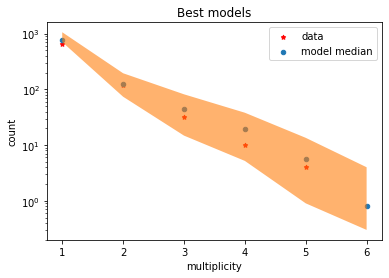

In [24]:
%matplotlib inline
from itertools import zip_longest
import numpy.ma as ma # for masked arrays
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep.transit_multiplicity):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7)[1:], lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
#plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7)[1:], lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Best models')
plt.legend()
plt.savefig('paper/best_models_unnormalized.pdf', format='pdf')
plt.show()

[66909.2, 707.7000000000002, 73.80000000000001, 14.8, 5.2, 0.9000000000000001, 0.30000000000000004] [67212.1, 764.7000000000002, 125.70000000000002, 44.70000000000001, 19.6, 5.700000000000001, 0.8] [67398.4, 1061.2, 194.8, 81.60000000000001, 38.10000000000001, 13.500000000000002, 4.0]


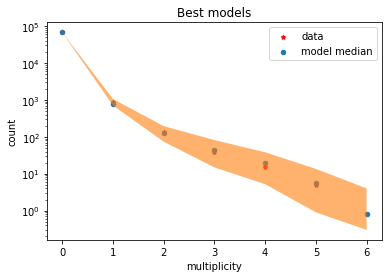

In [28]:
%matplotlib inline
from itertools import zip_longest
import numpy.ma as ma # for masked arrays
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep.transit_multiplicity_zero_bin):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7), nonzero_k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7), lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
#plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7), lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.yscale('log')
plt.title('Best models')
plt.legend()
plt.savefig('paper/best_models_0bin_unnormalized.pdf', format='pdf')
plt.show()

Best 0+ and 1+ matches

In [62]:
len(df_keep4.groupby(['m', 'b', 'c', 'f']))

67

[553.9944634853678, 59.4653647752395, 9.644630989856593, 3.7599857346647645, 0.85099685204617, 0.2818908585331943] [705.6265114328345, 75.32916641915877, 18.0351700001084, 7.928805748519348, 2.550314465408805, 0.5653537818055071] [723.9186550976139, 152.0224097020828, 68.41813403416558, 32.184231274638634, 8.591101694915254, 1.4228070175438596]


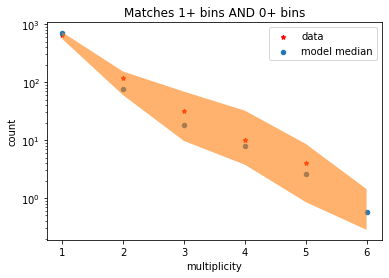

In [82]:
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep4.transit_multiplicity):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7)[1:], lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
#plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7)[1:], lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins AND 0+ bins')
plt.legend()
plt.savefig('paper/best_models_to_0_and_1.pdf', format='pdf')
plt.show()

#### Marginalized and 2D marginalized posteriors

2.0489205394606636e-101 7.506322084597007e-10 5.267375521298345e-09


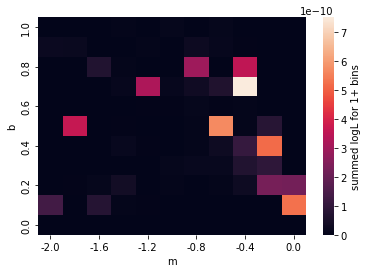

In [29]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('likelihood').reset_index().groupby(['b','m']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "m","likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.m.unique().round(1)), yticklabels=np.sort(df.b.unique().round(1)),
                cbar_kws={'label': 'summed logL for 1+ bins'})
#ax = sns.heatmap(np.log10(piv), xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.savefig('paper/m_vs_b_unnormalized.pdf', format='pdf')
plt.show()

In [30]:
def find_confidence_interval(array, percentile):
    #### manually find peak and then creep outward until I've taken over blah% area under the marginalized posterior
    
    # stopping criterion
    stop = 0.01*percentile*np.sum(array) 
    
    # initialize at peak likelihood
    area = 0
    arg = np.argmax(array)
    peak_arg = arg # save this off for function return
    area += array[arg]
    
    # probe step to the left and right
    # this strategy is based on looking at the shape of the posteriors
    # otherwise I'd be more worried about falling into local extrema
    left = arg-1
    right = arg+1
    try: 
        left_val = array[left]
    except:
        left_val = 0
    try:
        right_val = array[right]
    except:
        right_val = 0
        
    # if both left and right steps are successful, take the higher value 
    if left_val > right_val:
        direction = "left"
    else:
        direction = "right"
        
    while area < stop:            
        if direction == "left":
            arg -= 1
        elif direction == "right":
            arg += 1
            
        # update total area
        area += array[arg]
    
    return area, arg, peak_arg

5.267375521298346e-09
5.2673755212983455e-09
4.644273413147217e-09
5.674900400579615e-09
4.816089243020905e-09
5.2527331640804786e-09


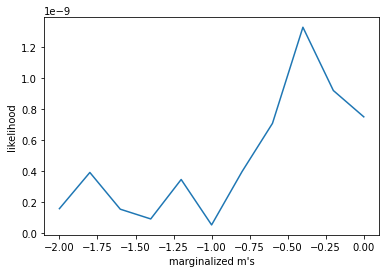

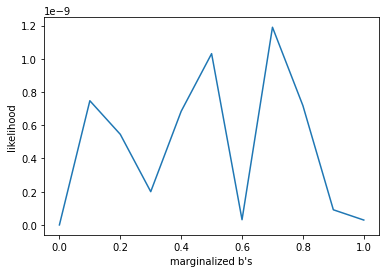

In [34]:
from numpy import trapz

b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    m_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    # if m==0, multiply the single collapsed m from all the redundant cutoffs by 11
    #if j==0:
    #    piv[j] = 11*piv[j]
    b_vs_m[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_m))
print(np.sum(m_vs_b))

print(simps(b_vs_m, dx=1))
print(simps(m_vs_b, dx=1))
print(trapz(b_vs_m, dx=1))
print(trapz(m_vs_b, dx=1))

#area, arg, peak_arg = find_confidence_interval(b_vs_m, 68)
#print(area/np.sum(b_vs_m), arg, peak_arg)
plt.plot(piv.columns, b_vs_m)
#plt.fill_between(piv.columns[arg+1:peak_arg+1], b_vs_m[arg+1:peak_arg+1])
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_m_unnormalized.pdf', format='pdf')
plt.show()

#area, arg, peak_arg = find_confidence_interval(m_vs_b, 68)
#print(area/np.sum(m_vs_b), arg, peak_arg)
plt.plot(piv.T.columns, m_vs_b)
#plt.fill_between(piv.T.columns[peak_arg-1:arg-1], m_vs_b[peak_arg-1:arg-1])
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_b_unnormalized.pdf', format='pdf')
plt.show()

5.293306229320065e-78 7.492228209346239e-10 5.267375521298345e-09


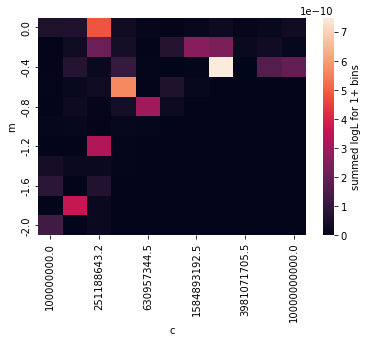

In [35]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('likelihood').reset_index().groupby(['m','c']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("m", "c","likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.c.unique().round(1)), yticklabels=np.sort(df.m.unique().round(1)),
                cbar_kws={'label': 'summed logL for 1+ bins'})
#cbar = plt.colorbar(piv)
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.m.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.savefig('paper/c_vs_m_unnormalized.pdf', format='pdf')
plt.show()

5.267375521298345e-09
5.267375521298345e-09


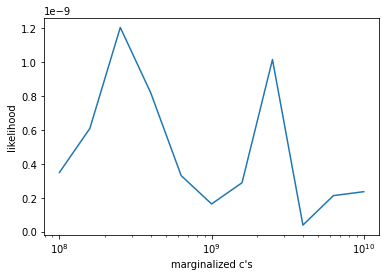

In [36]:
m_vs_c = np.zeros(len(piv))
c_vs_m = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    #if j==0: # if m==0 and I collapsed cutoffs down to it, multiply likelihood by 11 so it's not undercounted
        #piv.T[j] = 11*piv.T[j]
        #print(j)
    c_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(m_vs_c))
print(np.sum(c_vs_m))

#plt.plot(piv.columns, np.log10(m_vs_c))
#area, arg, peak_arg = find_confidence_interval(m_vs_c, 68)
#print(area/np.sum(m_vs_c), arg, peak_arg)
plt.plot(piv.columns, m_vs_c)
#plt.fill_between(piv.columns[peak_arg:arg], m_vs_c[peak_arg:arg])
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_c_unnormalized.pdf', format='pdf')
plt.show()

#plt.plot(piv.T.columns, c_vs_m)
#plt.xlabel("marginalized m's")
#plt.ylabel('likelihood')
#plt.show()

2.3643664539614305e-101 7.485535747589857e-10 5.2673755212983455e-09


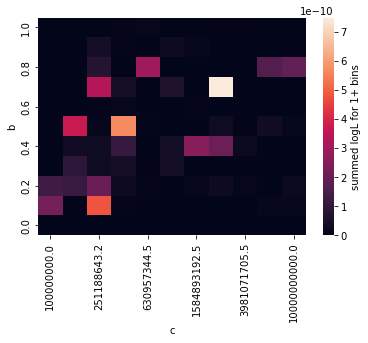

In [37]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('likelihood').reset_index().groupby(['b','c']).sum('likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "c","likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.fixed_c.unique().round(1)), yticklabels=np.sort(df.b.unique().round(1)),
                cbar_kws={'label': 'summed logL for 1+ bins'})
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.savefig('paper/c_vs_b_unnormalized.pdf', format='pdf')
plt.show()

1.5649263667755488e-05
1.5649263667755488e-05


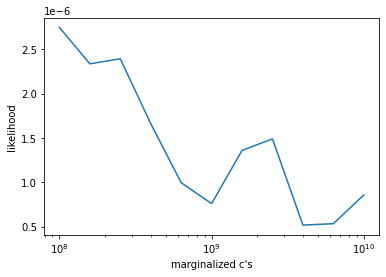

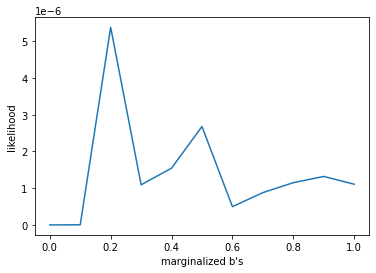

In [26]:
b_vs_c = np.zeros(len(piv))
c_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    c_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    b_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_c))
print(np.sum(c_vs_b))

#plt.plot(piv.columns, np.log10(m_vs_c))
plt.plot(piv.columns, b_vs_c)
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, c_vs_b)
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.show()

#### Multi:single ratios

In [91]:
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv')
pnum['iso_age_err'] = 0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))
pnum_young = pnum.loc[pnum.iso_age < 2]
pnum_old = pnum.loc[pnum.iso_age >= 2]
#print(pnum.loc[pnum.koi_count==5].kepid.unique())


#print(pnum.loc[pnum.koi_count==5][['kepid','koi_count','iso_age']])

In [92]:
pnum

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh_x,feh_err1,...,feh_err,RUWE,num_gaia_companions,Kmag_final_prov,evstate,logR,is_giant,fractional_err1,fractional_err2,iso_age_err
0,1432789,2MASS J19255986+3703334,5782,78.0,-78.0,4.280,0.137,-0.112,0.16,0.15,...,0.15,1.0029,0,NaN,NaN,0.180413,False,0.333866,-0.308307,2.010
1,1432789,2MASS J19255986+3703334,5782,78.0,-78.0,4.280,0.137,-0.112,0.16,0.15,...,0.15,1.0029,0,NaN,NaN,0.180413,False,0.333866,-0.308307,2.010
2,1575873,2MASS J19274232+3706046,6739,161.0,-202.0,3.948,0.259,-0.111,-0.24,0.30,...,0.15,0.9607,1,BinDet_NoCorr,NaN,0.224015,False,0.449438,-0.471910,0.410
3,1725016,2MASS J19290309+3714131,5922,184.0,-205.0,4.474,0.054,-0.216,-0.08,0.25,...,0.15,0.9929,0,NaN,NaN,0.163161,False,0.482587,-0.283582,1.540
4,1871056,2MASS J19281070+3722344,6207,112.0,-125.0,3.963,0.195,-0.105,0.24,0.15,...,0.15,1.0121,0,NaN,NaN,0.301030,False,0.239496,-0.168067,0.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,12602999,2MASS J19232978+5141066,6787,182.0,-202.0,3.762,0.285,-0.095,-0.16,0.30,...,NaN,1.1522,0,NaN,NaN,0.198382,False,0.465347,-0.475248,0.475
1071,12644822,2MASS J19162693+5144145,5795,156.0,-173.0,4.508,0.039,-0.208,-0.02,0.25,...,NaN,1.0399,0,NaN,NaN,0.261739,False,0.185185,-0.161866,1.265
1072,12645057,2MASS J19170407+5145044,5807,138.0,-173.0,4.576,0.038,-0.152,-0.40,0.30,...,NaN,0.9837,0,NaN,NaN,0.198107,False,0.281056,-0.346273,2.020
1073,12737015,2MASS J19215521+5157540,6059,109.0,-146.0,4.151,0.168,-0.112,0.16,0.15,...,0.15,1.0671,0,NaN,NaN,0.324899,False,0.238938,-0.163717,0.455


In [93]:
def calculate_multiplicity_ratio(row):
    multis = np.sum(row[1:])
    singles = row[0]
    return multis/singles

print(df_keep.young20_transit_multiplicity.apply(pad))
print(df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio))

print(df_keep.old20_transit_multiplicity.apply(pad))
print(df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio))

print(np.sum(k[1:])/k[0])
pnum.groupby('kepid').size().to_frame('kepid_count').reset_index()
#pnum['count'] = pnum.groupby('kepid').transform('count')

372      [94.50000000000001, 10.500000000000002, 3.0000...
373      [106.80000000000001, 11.100000000000001, 2.400...
374      [103.50000000000001, 6.900000000000001, 1.8000...
375       [126.0, 14.0, 4.0, 1.2000000000000002, 0.0, 0.0]
376                      [142.4, 14.8, 3.2, 1.6, 0.0, 0.0]
                               ...                        
41271    [106.20000000000002, 20.1, 10.200000000000001,...
41272    [100.20000000000002, 16.200000000000003, 11.70...
41303    [106.20000000000002, 23.400000000000002, 6.900...
41304    [98.70000000000002, 19.800000000000004, 5.7000...
41305    [94.20000000000002, 17.400000000000002, 6.3000...
Name: young20_transit_multiplicity, Length: 945, dtype: object
372      0.152381
373      0.137640
374      0.095652
375      0.152381
376      0.137640
           ...   
41271    0.350282
41272    0.317365
41303    0.344633
41304    0.303951
41305    0.312102
Name: young20_transit_multiplicity, Length: 945, dtype: float64
372      [615.900000000000

,kepid,kepid_count
0,1432789,2
1,1575873,1
2,1725016,1
3,1871056,2
4,2161949,2
...,...,...
841,12602999,1
842,12644822,1
843,12645057,1
844,12737015,1


[nan, nan, 1.3333333333333333, 0.46875, 0.6470588235294118, 0.6120689655172413, 0.7583892617449665, 0.7580645161290323, 0.7074235807860262, 0.7752808988764045, 0.7516339869281046, 0.7388724035608308, 0.7656675749318801, 0.7178217821782178, 0.7119815668202765, 0.6860215053763441, 0.6626506024096386, 0.6628571428571428, 0.6797020484171322, 0.6913357400722022, 0.7056737588652482, 0.6895368782161235, 0.700507614213198, 0.7011686143572621, 0.6912972085385879, 0.6866883116883117, 0.6892109500805152]


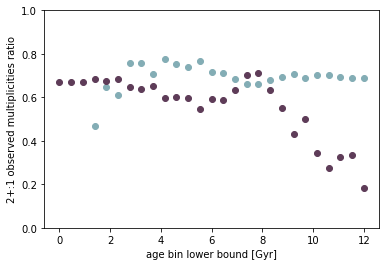

In [94]:
bins = 27
young_ratios = []
old_ratios = []
for i, a in enumerate(np.linspace(0,13,bins)):
        unique_kepids = pnum.drop_duplicates(subset=['kepid'])
        unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
        #unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
        unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
        pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
        #print(pnum_temp)
        pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0
    
        temp_young = pnum_temp.loc[pnum_temp.iso_age <= a]
        temp_old = pnum_temp.loc[pnum_temp.iso_age > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        
        k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        ###k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        
        k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        ###k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k

        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
print(young_ratios)
plt.scatter(np.linspace(0,12,bins), young_ratios, c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), old_ratios, c='#5e3c58', label='old')
plt.ylim([0, 1])
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.show()

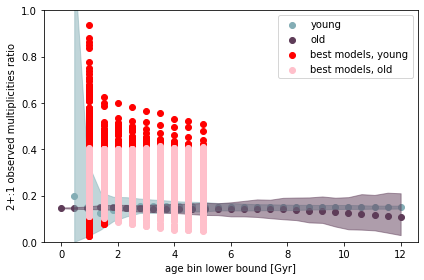

In [110]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv') # koi_score > 0.5
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_fpp.csv') # fpp_prob <= 0.5
#pnum = pnum.drop_duplicates(['kepid'])
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5 * (pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

bins = 13*2+1
young_ratios_array = np.zeros(bins)
old_ratios_array = np.zeros(bins)
samples = 1000
young_ratios_all = []
old_ratios_all = []
for iteration in range(samples):
    unique_kepids = pnum.drop_duplicates(subset=['kepid'])
    unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
    #unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
    unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
    pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
    #print(pnum_temp)
    pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0
        
    young_ratios = []
    old_ratios = []
    for i, a in enumerate(np.linspace(0,13,bins)):
        
        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= a]
        temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        
        ###k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        
        ###k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k

        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
        
        #print(k_temp_young, k_temp_old, np.sum(k_temp_young), np.sum(k_temp_old), young_ratio, old_ratio)
    #adsfadf
    """
    try:
        young_ratios_array += np.array(young_ratios)
    except Exception as e:
        print(e)
        asdfadf
        
    try:
        old_ratios_array += np.array(old_ratios)
    except Exception as e:
        print(e)
        asdfadf
    """
    young_ratios_all.append(young_ratios)
    old_ratios_all.append(old_ratios)

# plot bootstrapped data multi:single ratios
n_std = 3
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58', label='old')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)+np.std(np.array(ratios_all), axis=0), marker='+')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)-np.std(np.array(ratios_all), axis=0), marker='-')

young_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5')
old_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58')

# turn fill_betweens into shapely Polygon objects for contains-ing
young_fill = Polygon(young_fill.get_paths()[0].vertices)
old_fill = Polygon(old_fill.get_paths()[0].vertices)

# plot model multi:single ratios
plt.scatter(np.ones(len(df_keep))*1., df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r', label='best models, young')
plt.scatter(np.ones(len(df_keep))*1., df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink', label='best models, old')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2., df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2., df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3., df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3., df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4., df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4., df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*5., df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*5., df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')

plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.ylim(0.0, 1)
plt.legend()
plt.tight_layout()
#plt.savefig('paper/observed_and_best_model_multi_ratios.pdf', format='pdf')
plt.show()
    

In [111]:
df['young10_multiplicity_ratio'] = df.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old10_multiplicity_ratio'] = df.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young15_multiplicity_ratio'] = df.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old15_multiplicity_ratio'] = df.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young20_multiplicity_ratio'] = df.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old20_multiplicity_ratio'] = df.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young25_multiplicity_ratio'] = df.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old25_multiplicity_ratio'] = df.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young30_multiplicity_ratio'] = df.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old30_multiplicity_ratio'] = df.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young35_multiplicity_ratio'] = df.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old35_multiplicity_ratio'] = df.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young40_multiplicity_ratio'] = df.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old40_multiplicity_ratio'] = df.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young45_multiplicity_ratio'] = df.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old45_multiplicity_ratio'] = df.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young50_multiplicity_ratio'] = df.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old50_multiplicity_ratio'] = df.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)

df_keep['young10_multiplicity_ratio'] = df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old10_multiplicity_ratio'] = df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young15_multiplicity_ratio'] = df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old15_multiplicity_ratio'] = df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young20_multiplicity_ratio'] = df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old20_multiplicity_ratio'] = df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young25_multiplicity_ratio'] = df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old25_multiplicity_ratio'] = df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young30_multiplicity_ratio'] = df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old30_multiplicity_ratio'] = df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young35_multiplicity_ratio'] = df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old35_multiplicity_ratio'] = df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young40_multiplicity_ratio'] = df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old40_multiplicity_ratio'] = df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young45_multiplicity_ratio'] = df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old45_multiplicity_ratio'] = df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young50_multiplicity_ratio'] = df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old50_multiplicity_ratio'] = df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)

In [112]:
%matplotlib inline
check_flag = True
def plot_model_ratio(threshold, column, young_or_old, check_flag, first_or_not):
    """
    young_or_old: what color do I use
    check_flag: do I plot them all, or just those that fall within the fill_between polygon
    first_or_not: do I include a label
    """
    #print(np.ones(len(df_keep))*threshold, np.array(column.apply(pad).apply(calculate_multiplicity_ratio)))
    if check_flag == False:
        if (young_or_old == 'young') & (first_or_not == True):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='r', label='best models, young')
        elif (young_or_old == 'old') & (first_or_not == True):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='pink', label='best models, old')
        elif (young_or_old == 'young') & (first_or_not == False):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='r')
        elif (young_or_old == 'old') & (first_or_not == False):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='pink')
            
        plt.xlabel('age [Gyr]')
        plt.ylabel('2+:1 ratio')
        plt.show()
    
        return 
    
    elif check_flag == True:
        in_or_out = np.zeros(len(column))
        if (young_or_old == 'young') & (first_or_not == True):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = young_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='r', label='best models, young')
                    
        elif (young_or_old == 'old') & (first_or_not == True):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = old_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='pink', label='best models, old')
                    
        elif (young_or_old == 'young') & (first_or_not == False):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = young_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='r')
                    
        elif (young_or_old == 'old') & (first_or_not == False):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = old_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='pink')
                
        return in_or_out

"""
in_or_out = plot_model_ratio(2., df_keep.young20_transit_multiplicity, 'young', True, True)
print(in_or_out, len(in_or_out))
print(in_or_out[in_or_out > 0], len(in_or_out[in_or_out > 0]))
"""

df_keep['multi_match_young10'] = plot_model_ratio(1., df_keep.young10_transit_multiplicity, 'young', True, True)
df_keep['multi_match_old10'] = plot_model_ratio(1., df_keep.old10_transit_multiplicity, 'old', True, True)
df_keep['multi_match_young15'] = plot_model_ratio(1.5, df_keep.young15_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old15'] = plot_model_ratio(1.5, df_keep.old15_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young20'] = plot_model_ratio(2., df_keep.young20_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old20'] = plot_model_ratio(2., df_keep.old20_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young25'] = plot_model_ratio(2.5, df_keep.young25_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old25'] = plot_model_ratio(2.5, df_keep.old25_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young30'] = plot_model_ratio(3., df_keep.young30_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old30'] = plot_model_ratio(3., df_keep.old30_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young35'] = plot_model_ratio(3.5, df_keep.young35_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old35'] = plot_model_ratio(3.5, df_keep.old35_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young40'] = plot_model_ratio(4., df_keep.young40_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old40'] = plot_model_ratio(4., df_keep.old40_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young45'] = plot_model_ratio(4.5, df_keep.young45_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old45'] = plot_model_ratio(4.5, df_keep.old45_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young50'] = plot_model_ratio(5., df_keep.young50_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old50'] = plot_model_ratio(5., df_keep.old50_transit_multiplicity, 'old', True, False)

#plt.xlabel('age [Gyr]')
#plt.ylabel('2+:1 ratio')
#plt.show()

In [113]:
keep10 = df_keep.loc[(df_keep.multi_match_young10 == 1) & (df_keep.multi_match_old10 == 1)]
keep15 = df_keep.loc[(df_keep.multi_match_young15 == 1) & (df_keep.multi_match_old15 == 1)]
keep20 = df_keep.loc[(df_keep.multi_match_young20 == 1) & (df_keep.multi_match_old20 == 1)]
keep25 = df_keep.loc[(df_keep.multi_match_young25 == 1) & (df_keep.multi_match_old25 == 1)]
keep30 = df_keep.loc[(df_keep.multi_match_young30 == 1) & (df_keep.multi_match_old30 == 1)]
keep35 = df_keep.loc[(df_keep.multi_match_young35 == 1) & (df_keep.multi_match_old35 == 1)]
keep40 = df_keep.loc[(df_keep.multi_match_young40 == 1) & (df_keep.multi_match_old40 == 1)]
keep45 = df_keep.loc[(df_keep.multi_match_young45 == 1) & (df_keep.multi_match_old45 == 1)]
keep50 = df_keep.loc[(df_keep.multi_match_young50 == 1) & (df_keep.multi_match_old50 == 1)]

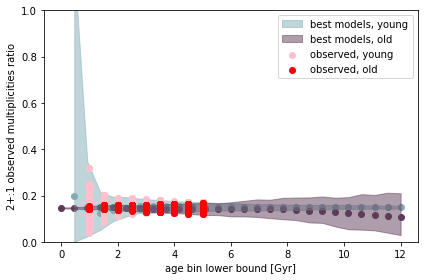

In [114]:
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58')

young_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5', label='best models, young')
old_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58', label='best models, old')

plt.scatter(np.ones(len(keep10))*1., keep10.young10_multiplicity_ratio, color='pink', label='observed, young')
plt.scatter(np.ones(len(keep10))*1., keep10.old10_multiplicity_ratio, color='r', label='observed, old')
plt.scatter(np.ones(len(keep15))*1.5, keep15.young15_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep15))*1.5, keep15.old15_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep20))*2., keep20.young20_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep20))*2., keep20.old20_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep25))*2.5, keep25.young25_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep25))*2.5, keep25.old25_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep30))*3., keep30.young30_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep30))*3., keep30.old30_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep35))*3.5, keep35.young35_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep35))*3.5, keep35.old35_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep40))*4., keep40.young40_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep40))*4., keep40.old40_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep45))*4.5, keep45.young45_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep45))*4.5, keep45.old45_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep50))*5., keep50.young50_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep50))*5., keep50.old50_multiplicity_ratio, color='r')

plt.ylim([0, 1])
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.tight_layout()
plt.legend()
plt.savefig('paper/observed_and_best_model_multi_ratios_unnormalized.pdf', format='pdf')
plt.show()

remaining based on transit multiplicity:  212
remaining after ruling out intact fractions:  33


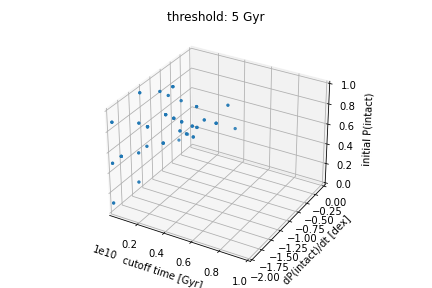

In [52]:
df_keep_multi = df_keep.loc[(df_keep.multi_match_young50 == 1) & (df_keep.multi_match_old50 == 1)]
%matplotlib widget

print("remaining based on transit multiplicity: ", len(df_keep.groupby(['m','b','c'])))
print("remaining after ruling out intact fractions: ", len(df_keep_multi.groupby(['m','b','c'])))
#print("remaining after ruling out intact fractions: ", len(df_keep_multi.groupby(['m','b','c','f'])))
fig = plt.figure()
ax = plt.axes(projection='3d')

im = ax.scatter3D(df_keep_multi.fixed_c, df_keep_multi.m, df_keep_multi.b, s=5)
ax.set_xlabel('cutoff time [Gyr]')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
ax.set_title('threshold: 5 Gyr')
fig.tight_layout()
#plt.savefig('paper/best_models_50gyr.pdf', format='pdf')
plt.show()

In [100]:
df_keep_deduped = df_keep.drop_duplicates(subset=['m','b','c','f'])
df_keep_deduped['model_tuple'] = list(zip(df_keep_deduped.m, df_keep_deduped.b, df_keep_deduped.c, df_keep_deduped.f))
#df_keep_deduped

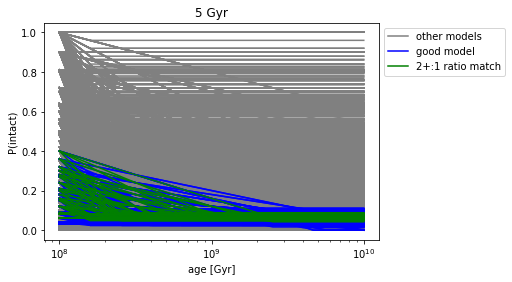

In [109]:
%matplotlib inline
def compute_prob(x, m, b, c, f):
    return f*(b + m*(np.log10(x)-8))

def compute_prob_after_cutoff(x, m, b, c, f):
    return f*(b + m*(np.log10(c)-8))

x = np.array(np.linspace(1e8, 1e10, 1000))
df_keep_deduped_multi = df_keep_deduped.loc[(df_keep_deduped.multi_match_young50 == 1) & (df_keep_deduped.multi_match_old50 == 1)]

count1 = 0
count2 = 0
count3 = 0
for m in np.linspace(-2, 0, 11):
    for b in np.linspace(0, 1, 11):
        for c in np.logspace(8, 10, 11):
            for f in np.linspace(0, 1, 11):
                before = x[x<=c]
                after = x[x>c]
                y_before = compute_prob(before, m, b, c, f)
                y_after = np.ones(len(after)) * compute_prob_after_cutoff(after, m, b, c, f)
                y = np.concatenate((y_before,y_after))
                y[y<0] = 0
                y[y>1] = 1
                #print(tuple([m,b,c]))
                #print(list(df_keep_deduped.model_tuple)[0])
                #adsfdf
                if tuple([m,b,c,f]) in list(df_keep_deduped_multi.model_tuple):
                    if count1 < 1:
                        plt.plot(x, y, color='green',zorder=3, label='2+:1 ratio match')
                    else:
                        plt.plot(x, y, color='green',zorder=3)
                    count1 += 1

                elif tuple([m,b,c,f]) in list(df_keep_deduped.model_tuple):
                    #count2 = 0
                    if count2 < 1:
                        plt.plot(x, y, color='blue',zorder=2, label='good model')
                    else:
                         plt.plot(x, y, color='blue',zorder=2)
                    count2 += 1
                else:
                    #count3 = 0
                    if count3 < 1:
                        plt.plot(x, y, color='gray',zorder=1, label='other models')
                    else:
                        plt.plot(x, y, color='gray',zorder=1)
                    count3 += 1

plt.ylabel('P(intact)')
plt.xlabel('age [Gyr]')
plt.xscale('log')
plt.title('5 Gyr')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('paper/models_good_50gyr_unnormalized.pdf', format='pdf')
plt.show()

In [130]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)

def compute_prob_vectorized(df, m, b, cutoff): # adapted from Ballard et al in prep, log version
    # calculate probability of intact vs disrupted

    # if/elif/elif/etc in vectorized form
    """
    df['prob_intact'] = np.where(
        df['iso_age']*1e9 <= 1e8, b, np.where(
            df['iso_age']*1e9 > 1e8, b+m*(np.log10(df['iso_age'])-8), np.where(
                df['iso_age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8))))
    """

    try:
        df['prob_intact'] = np.where(
                ((df['iso_age']*1e9 > 1e8) & (df['iso_age']*1e9 <= cutoff)), b+m*(np.log10(df['iso_age']*1e9)-8), np.where(
                    df['iso_age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8), b))
    except: # for asteroseismic ages
        df['prob_intact'] = np.where(
                ((df['Age']*1e9 > 1e8) & (df['Age']*1e9 <= cutoff)), b+m*(np.log10(df['Age']*1e9)-8), np.where(
                    df['Age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8), b))

    # handle impossible probabilities
    df['prob_intact'] = np.where(
        df['prob_intact']<0, 0, np.where(
            df['prob_intact']>1, 1, df['prob_intact']))
            
    return df
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)

df_keep_deduped = df_keep.drop_duplicates(subset=['m','b','c'])
for i in df_keep_deduped:
    print(i)
    asdfd

filename


NameError: name 'asdfd' is not defined